In [18]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set()

In [26]:
eventfiles = [
    '../../ee_to_ttbar/runs/unweighted/events.out.tfevents.1606090424.roadrunner.26688.0',
    '../../ee_to_ttbar/runs/weighted_max_run/events.out.tfevents.1605883545.roadrunner.19782.0',
    '../../ee_to_ttbar/runs/weighted_mean_run/events.out.tfevents.1605786229.roadrunner.13957.0',
    '../../ee_to_ttbar/runs/weighted_min_run/events.out.tfevents.1605786429.roadrunner.14062.0',
    '../../pp_to_ttbar/runs/negative_weights_run/events.out.tfevents.1605890428.roadrunner.20912.0',
]
eventnames = ['unweighted_all', 'unweighted', 'mean_weighted', 'weighted', 'negative weights']
eventtype = ['ee', 'ee', 'ee', 'ee', 'pp']

## ee -> ttbar metrics

In [34]:
ee_ess = {}
ee_loss_train = {}
ee_loss_test = {}

for i in range(len(eventfiles)):
    # Filter out proton events
    if eventtype[i] != 'ee':
        continue
    # Open event file
    ea = event_accumulator.EventAccumulator(eventfiles[i])
    ea.Reload()
    # Construct simple lists from event accumulator
    name = "{}_{}".format(eventtype[i], eventnames[i])
    ## Ess
    tmp = ea.Scalars('Effective_sample_size')
    ee_ess[name] = [tmp[j].value for j in range(len(tmp))]
    ## Loss train
    tmp = ea.Scalars('Loss_train')
    ee_loss_train[name] = [tmp[j].value for j in range(len(tmp))]
    ## Loss test
    tmp = ea.Scalars('Loss_test')
    ee_loss_test[name] = [tmp[j].value for j in range(len(tmp))]

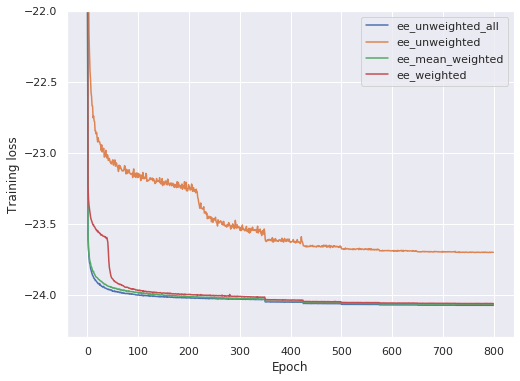

In [50]:
plt.figure(figsize=(8,6))
for k, v in ee_loss_train.items():
    plt.plot(v, label=k)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Training loss")
plt.ylim([-24.3, -22])
plt.savefig("ee_training_loss.pdf")

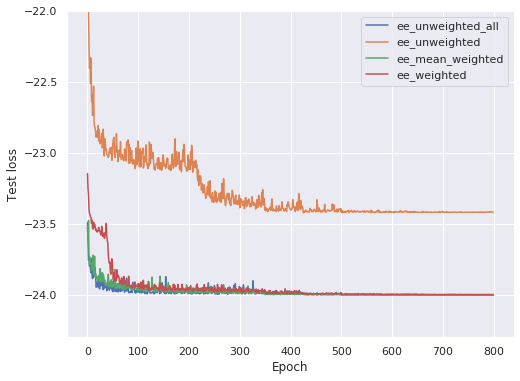

In [51]:
plt.figure(figsize=(8,6))
for k, v in ee_loss_test.items():
    plt.plot(v, label=k)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Test loss")
plt.ylim([-24.3, -22])
plt.savefig("ee_test_loss.pdf")

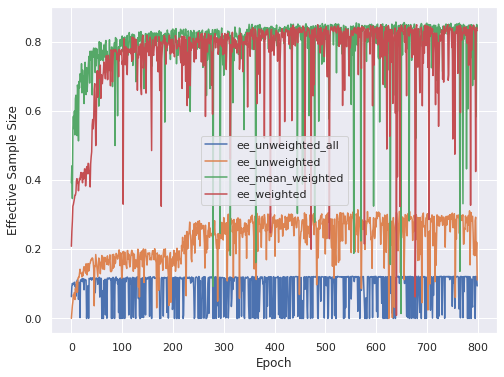

In [53]:
plt.figure(figsize=(8,6))
for k, v in ee_ess.items():
    plt.plot(v, label=k)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Effective Sample Size")
plt.savefig("ee_ess.pdf")

In [54]:
## pp -> ttbar metrics

In [61]:
pp_loss_train = {}
pp_loss_test = {}

for i in range(len(eventfiles)):
    # Filter out proton events
    if eventtype[i] != 'pp':
        continue
    # Open event file
    ea = event_accumulator.EventAccumulator(eventfiles[i])
    ea.Reload()
    # Construct simple lists from event accumulator
    name = "{}_{}".format(eventtype[i], eventnames[i])
    ## Loss train
    tmp = ea.Scalars('Loss_train')
    pp_loss_train[name] = [tmp[j].value for j in range(len(tmp))]
    ## Loss test
    tmp = ea.Scalars('Loss_test')
    pp_loss_test[name] = [tmp[j].value for j in range(len(tmp))]

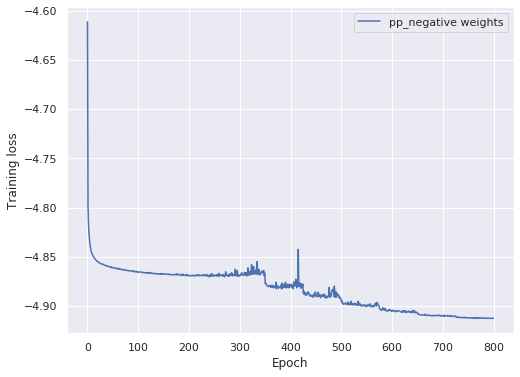

In [62]:
plt.figure(figsize=(8,6))
for k, v in pp_loss_train.items():
    plt.plot(v, label=k)
plt.xlabel("Epoch")
plt.ylabel("Training loss")
plt.savefig("pp_training_loss.pdf")

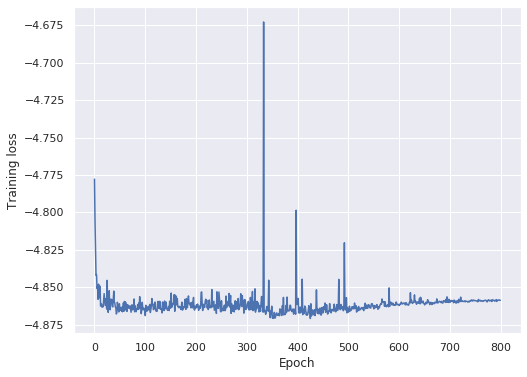

In [63]:
plt.figure(figsize=(8,6))
for k, v in pp_loss_test.items():
    plt.plot(v, label=k)
plt.xlabel("Epoch")
plt.ylabel("Training loss")
plt.savefig("pp_test_loss.pdf")